<a href="https://colab.research.google.com/github/chahuja/colab-notebooks/blob/master/bsuite_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with `bsuite`

[bit.ly/bsuite-tutorial-colab](http://bit.ly/bsuite-tutorial-colab)

The Core RL Behaviour Suite, or `bsuite` for short, is a collection of experiments that investigate the core capabilities of a reinforcement learning (RL) agent.
- This notebook is designed to get you up to speed on the [open source code](www.github.com/deepmind/bsuite) for running `bsuite`.
- You can read more about the project via the [arXiv paper](linktopaper.com).




## Imports / installation

In this section we will use `pip` to install `bsuite`.

Make sure that you are running a Python 3 runtime.

In [0]:
#@title Installing bsuite
!git clone https://github.com/deepmind/bsuite.git
!pip install -q bsuite/

Cloning into 'bsuite'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 262 (delta 130), reused 255 (delta 123), pack-reused 0
Receiving objects: 100% (262/262), 398.51 KiB | 13.74 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [0]:
#@title Basic imports
import bsuite

## Experiments
`bsuite` defines a set of *experiments*. 
In the context of `bsuite` an *experiment* consists of three parts:
1. **Environments:** a fixed set of configurations of an RL environment (e.g. a 5-armed bandit with variable levels of noise).
2. **Protocol**: a fixed regime of agent/environment interaction (e.g. 100 episodes of experience).
3. **Analysis**: a fixed set of procedures to maps agent *behaviour* to results and plots.

Each configuration within an experiment is identified by a string identifier called `bsuite_id`. 
<br> Each `bsuite_id` is constructed by concatenating experiment name, the separator `/`, and a number identifyng the specific configuration.
<br> The valid `bsuite_id` are defined in `bsuite.sweep`.

In [0]:
#@title Valid Ids across all experiments:
from bsuite import sweep
print('All possible values for bsuite_id:', sweep.SWEEP)

All possible values for bsuite_id: ('bandit/0', 'bandit/1', 'bandit/2', 'bandit/3', 'bandit/4', 'bandit/5', 'bandit/6', 'bandit/7', 'bandit/8', 'bandit/9', 'bandit/10', 'bandit/11', 'bandit/12', 'bandit/13', 'bandit/14', 'bandit/15', 'bandit/16', 'bandit/17', 'bandit/18', 'bandit/19', 'bandit_noise/0', 'bandit_noise/1', 'bandit_noise/2', 'bandit_noise/3', 'bandit_noise/4', 'bandit_noise/5', 'bandit_noise/6', 'bandit_noise/7', 'bandit_noise/8', 'bandit_noise/9', 'bandit_noise/10', 'bandit_noise/11', 'bandit_noise/12', 'bandit_noise/13', 'bandit_noise/14', 'bandit_noise/15', 'bandit_noise/16', 'bandit_noise/17', 'bandit_noise/18', 'bandit_noise/19', 'bandit_scale/0', 'bandit_scale/1', 'bandit_scale/2', 'bandit_scale/3', 'bandit_scale/4', 'bandit_scale/5', 'bandit_scale/6', 'bandit_scale/7', 'bandit_scale/8', 'bandit_scale/9', 'bandit_scale/10', 'bandit_scale/11', 'bandit_scale/12', 'bandit_scale/13', 'bandit_scale/14', 'bandit_scale/15', 'bandit_scale/16', 'bandit_scale/17', 'bandit_scal

## Exploring an example experiment

<img src="https://storage.cloud.google.com/bsuite-colab-images/bandit.png" alt="bandit diagram" height="300"/>

One simple experiment in `bsuite` is called *bandit noise*.
<br>
This corresponds to a number of instantiations of a simple independent 11-armed bandit problem,<br>where the rewards for each arms are perturbed by white Gaussian noise $N(0, \sigma^2)$.

**Environments**:
- The actions have rewards in [0.0, 0.1, .., 1.0] randomly assigned.
- Run 4 seeds for each $\sigma$ in [0.1, 0.3, 1., 3, 10]

**Protocol**:
- run each configuration for 10k episodes,


**Analysis**:
- Score is 1 - 2 * average_regret at 10k episodes.
- Must log `episode`, `total_regret` for standard analysis.

In [0]:
#@title Ids for an example experiment:
print('List bsuite_id for "bandit_noise" experiment:')
print(sweep.BANDIT_NOISE)

List bsuite_id for "bandit_noise" experiment:
('bandit_noise/0', 'bandit_noise/1', 'bandit_noise/2', 'bandit_noise/3', 'bandit_noise/4', 'bandit_noise/5', 'bandit_noise/6', 'bandit_noise/7', 'bandit_noise/8', 'bandit_noise/9', 'bandit_noise/10', 'bandit_noise/11', 'bandit_noise/12', 'bandit_noise/13', 'bandit_noise/14', 'bandit_noise/15', 'bandit_noise/16', 'bandit_noise/17', 'bandit_noise/18', 'bandit_noise/19')


In [0]:
#@title List the configurations for the given experiment
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_from_id(bsuite_id)
  print('bsuite_id={}, settings={}, num_episodes={}'
        .format(bsuite_id, sweep.SETTINGS[bsuite_id], env.bsuite_num_episodes))

bsuite_id=bandit_noise/0, settings={'noise_scale': 0.1, 'seed': 0}, num_episodes=10000
bsuite_id=bandit_noise/1, settings={'noise_scale': 0.1, 'seed': 1}, num_episodes=10000
bsuite_id=bandit_noise/2, settings={'noise_scale': 0.1, 'seed': 2}, num_episodes=10000
bsuite_id=bandit_noise/3, settings={'noise_scale': 0.1, 'seed': 3}, num_episodes=10000
bsuite_id=bandit_noise/4, settings={'noise_scale': 0.3, 'seed': 0}, num_episodes=10000
bsuite_id=bandit_noise/5, settings={'noise_scale': 0.3, 'seed': 1}, num_episodes=10000
bsuite_id=bandit_noise/6, settings={'noise_scale': 0.3, 'seed': 2}, num_episodes=10000
bsuite_id=bandit_noise/7, settings={'noise_scale': 0.3, 'seed': 3}, num_episodes=10000
bsuite_id=bandit_noise/8, settings={'noise_scale': 1.0, 'seed': 0}, num_episodes=10000
bsuite_id=bandit_noise/9, settings={'noise_scale': 1.0, 'seed': 1}, num_episodes=10000
bsuite_id=bandit_noise/10, settings={'noise_scale': 1.0, 'seed': 2}, num_episodes=10000
bsuite_id=bandit_noise/11, settings={'nois

## Loading a `bsuite` environment

For any of the values of `bsuite_id` in `sweep.SWEEP` we can instantiate the environment, with the appropriate configurations, using:


In [0]:
#@title Instantiate the environment corresponding to a given `bsuite_id`
env = bsuite.load_from_id("bandit_noise/0")

By default the environment implements the `dm_env` agent-environment interface:
* the main interaction with an environment is via the `step()` method.
* `step()` takes an discrete `action` index as input and returns a `TimeStep` namedtuple 
* `TimeStep` contains the fields `step_type`, `reward`, `discount`,  and `observation`.

We refer the user to the `dm_env`'s [github](https://github.com/deepmind/dm_env/blob/master/docs/index.md) for further details on the API.

In [0]:
#@title Default configuration is dm_env
import dm_env
env = bsuite.load_from_id(bsuite_id='bandit_noise/0')
isinstance(env, dm_env.Environment)

True

Alternatively the environments may also be made to implement the OpenAI [gym](https://github.com/openai/gym) agent-environment interface. <br>This is done using a lightweight wrapper defined in `bsuite/utils`

In [0]:
#@title Installing OpenAI gym
! pip install -q gym
import gym

In [0]:
#@title Simple to load bsuite environments as OpenAI gym
from bsuite.utils import gym_wrapper
raw_env = bsuite.load_from_id(bsuite_id='memory_len/0')
env = gym_wrapper.GymWrapper(raw_env)
isinstance(env, gym.Env)

True

## Running a `bsuite` experiment

Once you have loaded a `bsuite` environment, you just need to interact with that environment for the correct number of episodes.

Since `bsuite` experiments only measure the *behaviour* of the agent, we can handle all logging required to analyse the experiments within the `bsuite` environment .

If you want to record the data from the experiment, you should specify `load_and_record`. By default this will generate a csv file indexed by bsuite_id.

In [0]:
#@title Running a random agent with a bsuite environment:
import numpy as np
SAVE_PATH_RAND = '/tmp/bsuite/rand'
env = bsuite.load_and_record('bandit_noise/0', save_path=SAVE_PATH_RAND)

for episode in range(env.bsuite_num_episodes):
  timestep = env.reset()
  while not timestep.last():
    action = np.random.choice(env.action_spec().num_values)
    timestep = env.step(action)

Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.


In [0]:
#@title You can see the data that is logged to csv
!cat /tmp/bsuite/rand/bsuite_id_-_bandit_noise-0.csv

episode,episode_len,episode_return,steps,total_regret,total_return
1,1,1.1764052345967664,1,0.0,1.1764052345967664
2,1,0.5400157208367223,2,0.5,1.7164209554334886
3,1,0.9978737984105739,3,0.6,2.7142947538440625
4,1,0.9240893199201459,4,0.8999999999999999,3.6383840737642084
5,1,0.3867557990149968,5,1.7,4.025139872779205
6,1,0.9022722120123589,6,1.7,4.9274120847915635
7,1,0.895008841752559,7,1.9,5.8224209265441225
8,1,-0.01513572082976979,8,2.9,5.8072852057143525
9,1,0.38967811482064424,9,3.5,6.196963320534997
10,1,0.5410598501938373,10,4.0,6.738023170728834
12,1,0.4454273506962976,12,5.1000000000000005,7.797854878541219
14,1,1.0121675016492828,14,5.300000000000001,9.686126152705203
17,1,0.14940790731576062,17,7.4,10.813287816032933
20,1,0.6145904260698276,20,8.600000000000001,12.53866918589127
25,1,1.0269754623987608,25,10.800000000000002,15.387934644095967
30,1,1.1469358769900284,30,13.400000000000002,17.928569341789526
40,1,0.5697697249424666,40,17.400000000000002,23.850169892864702
5

In [0]:
#@title To run the whole experiment, simply repeat for all bsuite_id
def run_random_agent(bsuite_id, save_path=SAVE_PATH_RAND, overwrite=True):
  """Evaluates a random agent experiment on a single bsuite_id."""
  env = bsuite.load_and_record(bsuite_id, save_path, overwrite=overwrite)
  for episode in range(env.bsuite_num_episodes):
    timestep = env.reset()
    while not timestep.last():
      action = np.random.choice(env.action_spec().num_values)
      timestep = env.step(action)
  return

for bsuite_id in sweep.BANDIT_NOISE:
  run_random_agent(bsuite_id)

Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.
Logging results to CSV file for each bsuite_id i

## Loading bsuite results

We have now run a random agent across a simple bsuite experiment.

In order to make use of the standard analysis [notebook](linktonotebook.com) you just need to point to the saved data.

In [0]:
#@title We have logged results as CSV files in SAVE_PATH
from bsuite.logging import csv_load
DF, _ = csv_load.load_bsuite(SAVE_PATH_RAND)

In [0]:
#@title The bsuite data is now collated and processed in DF
DF.head()

,episode,episode_len,episode_return,steps,total_regret,total_return,bsuite_id,results_dir,bsuite_env,chain_length,height_threshold,memory_length,n_distractor,noise_scale,num_bits,reward_scale,seed,size,x_reward_threshold,agent_name
0,1,1,0.862435,1,0.3,0.862435,bandit_noise/1,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,1.0,NaN,NaN,/tmp/bsuite/rand
1,2,1,0.138824,2,1.1,1.001259,bandit_noise/1,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,1.0,NaN,NaN,/tmp/bsuite/rand
2,3,1,0.447183,3,1.6,1.448442,bandit_noise/1,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,1.0,NaN,NaN,/tmp/bsuite/rand
3,4,1,0.292703,4,2.2,1.741145,bandit_noise/1,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,1.0,NaN,NaN,/tmp/bsuite/rand
4,5,1,0.586541,5,2.7,2.327686,bandit_noise/1,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,1.0,NaN,NaN,/tmp/bsuite/rand


In [0]:
#@title We can make use of bsuite summary scoring... and the random agent scores essentially zero
from bsuite.experiments import summary_analysis
BSUITE_SCORE = summary_analysis.bsuite_score(DF)
BSUITE_SCORE

,bsuite_env,finished,score,tags,type
0,bandit_noise,True,0.000682,"('noise',)",noise


tags=('noise',)


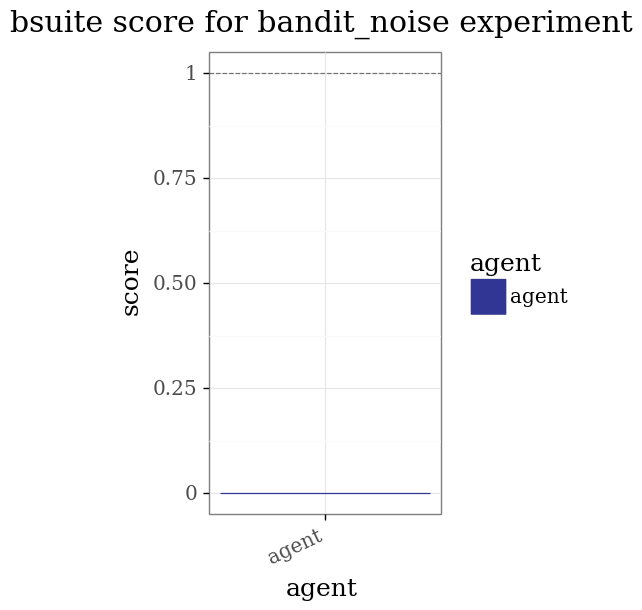

<ggplot: (8757295839657)>

In [0]:
#@title As well as plots specialized to the experiment
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise')

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


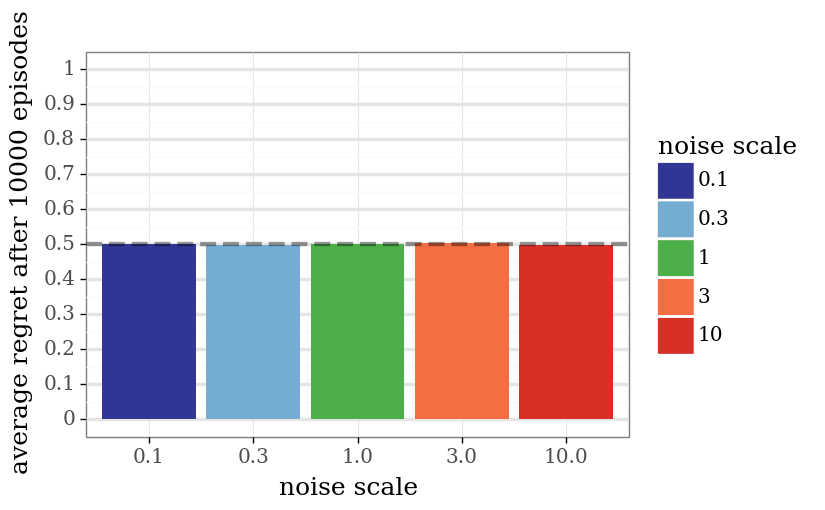

<ggplot: (-9223363279559656213)>

In [0]:
#@title average regret over learning (lower is better)
from bsuite.experiments.bandit_noise import analysis as bandit_noise_analysis
bandit_noise_analysis.plot_average(bandit_noise_df)

## Running a baseline agent

So far we have only seen a very naive agent that doesn't perform any learning.

As part of our open source effort, we also released a collection of implementations.

In this section we will load a DQN agent, and then compare its performance against the random agent.


In [0]:
#@title Installing requirements for the `bsuite` baselines agents
! pip install -q tensorflow==1.13.2
! pip install -q tensorflow-probability==0.6.0
! pip install -q dm-sonnet
! pip install -q trfl

     |████████████████████████████████| 92.6MB 36.9MB/s 
     |████████████████████████████████| 3.2MB 35.8MB/s 
     |████████████████████████████████| 368kB 33.6MB/s 
     |████████████████████████████████| 798kB 4.7MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 


In [0]:
#@title Run the default `dqn` agent on the `memory_len` experiment
from bsuite.baselines import experiment
from bsuite.baselines.dqn import dqn

SAVE_PATH_DQN = '/tmp/bsuite/dqn'
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_and_record(bsuite_id, save_path=SAVE_PATH_DQN)
  agent = dqn.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
  )
  experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.


W0813 09:45:41.555912 140117806045056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0813 09:45:41.709813 140117806045056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/dqn.
Logging results to CSV file for each bsuite_id in /tmp/bsuite/

## Loading and comparing two agent runs

To compare the performance of the DQN and random agents, we simply point the load at the two save paths.

In [0]:
#@title When loading multiple evaluations, `load_bsuite` automatically breaks them out by `SWEEP_VARS`
experiments = {'dqn': SAVE_PATH_DQN, 'rand': SAVE_PATH_RAND}
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)

In [0]:
#@title `SWEEP_VARS` is a list of columns that identify the separate agents
for var in SWEEP_VARS:
  print(var, DF[var].unique())

agent_name ['dqn' 'rand']


In [0]:
#@title Passing `SWEEP_VARS` to `bsuite_score` automatically breaks out score by agent
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
BSUITE_SCORE

,agent_name,level_1,bsuite_env,finished,score,tags,type
0,dqn,0,bandit_noise,True,0.724990,"('noise',)",noise
1,rand,0,bandit_noise,True,0.000682,"('noise',)",noise


tags=('noise',)


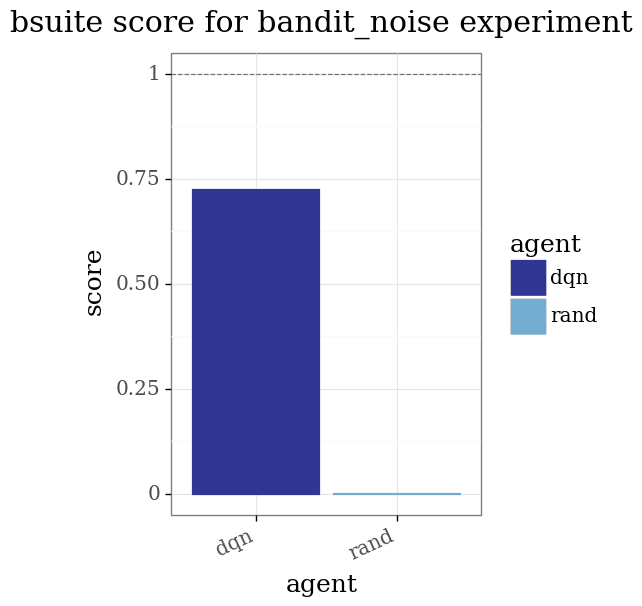

<ggplot: (8757260255878)>

In [0]:
#@title All the `bsuite` plots will automatically compare performance on SWEEP_VARS
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise', SWEEP_VARS)

In [0]:
#@title average regret over learning (lower is better)
bandit_noise_analysis.plot_average(bandit_noise_df, SWEEP_VARS)

## Build your own agents however you like!

The `bsuite` does not make any assumption about how you implement your agents.
<br>You can use `TensorFlow`, `JAX`, `Dopamine`, `OpenAI` baselines, or any other reinforcement learning framework .

For instance below we show how to run the PPO `OpenAI` baseline agent

In [0]:
#@title 
!git clone https://github.com/openai/baselines.git
!pip install baselines/

In [0]:
from baselines.common.vec_env import dummy_vec_env
from baselines.ppo2 import ppo2
from bsuite.utils import gym_wrapper
import tensorflow as tf


SAVE_PATH_PPO = '/tmp/bsuite/ppo'

def _load_env():
  raw_env = bsuite.load_and_record(
      bsuite_id='bandit_noise/0', 
      save_path=SAVE_PATH_PPO, logging_mode='csv', overwrite=True)
  return gym_wrapper.GymWrapper(raw_env)
env = dummy_vec_env.DummyVecEnv([_load_env])

ppo2.learn(
    env=env, network='mlp', lr=1e-3, gamma=.99,
    total_timesteps=10000, nsteps=100)

In [0]:
#@title The bsuite data has been logged in the same way
!cat /tmp/bsuite/ppo/bsuite_id_-_bandit_noise-0.csv

## Next steps

You now have a good introduction to the basic facility of running `bsuite` code.

For an example of the sort of output you can get through running a full `sweep.SWEEP` have a look at some pre-baked reports:
- www.bit.ly/bsuite-agents
- www.bit.ly/bsuite-optimizer
- www.bit.ly/bsuite-ensemble

There are lots more ways you can use `bsuite` in your research:
- Examples using `bsuite` from Dopamine framework.
- Automated `bsuite` appendix suitable for inclusion in conference paper.


If you have any questions or comments... please get in touch!

